In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from acquire import acquire_zillow, quick_sum, object_values, cont_hist

## Clustering Rough Draft Notebook

### Acquire Zillow

In [2]:
zillow_df = acquire_zillow() ## <-- calling our function documented in acquire_zillow.py

zillow_df.head() ## <-- Looking at out dataframe

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,6,-0.001011,...,None,NaN,6.037461e+13,Central,None,None,Central,Single Family Residential,None,None


In [3]:
quick_sum(zillow_df)  ## <-- function to give shape, datatypes, and numerical statistics

Dataframe Shape (rows, columns):
(52320, 68)
-----------------------------------------------

Datatypes of Columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52320 entries, 0 to 77579
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   storytypeid                   47 non-null     float64
 2   propertylandusetypeid         52320 non-null  float64
 3   heatingorsystemtypeid         33850 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13615 non-null  float64
 7   parcelid                      52320 non-null  int64  
 8   id                            52320 non-null  int64  
 9   logerror                      52320 non-null  float64
 10  transactiondate               52320 non-null  object 
 11  bas

In [4]:
## dropping columns with 0 non null values right away based on the .info printout
null_cols = ['buildingclassdesc', 'finishedsquarefeet13', 
             'finishedsquarefeet15', 'buildingclasstypeid']

zillow_df = zillow_df.drop(columns = null_cols) ## <-- dropping those pesky columns

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52320 entries, 0 to 77579
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   storytypeid                   47 non-null     float64
 2   propertylandusetypeid         52320 non-null  float64
 3   heatingorsystemtypeid         33850 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   airconditioningtypeid         13615 non-null  float64
 6   parcelid                      52320 non-null  int64  
 7   id                            52320 non-null  int64  
 8   logerror                      52320 non-null  float64
 9   transactiondate               52320 non-null  object 
 10  basementsqft                  47 non-null     float64
 11  bathroomcnt                   52320 non-null  float64
 12  bedroomcnt                    52320 non-null  float64
 13  b

In [5]:
object_values(zillow_df)  ## <-- function that lists object columns's value counts

transactiondate
2017-06-30    809
2017-04-28    614
2017-05-31    565
2017-07-28    546
2017-08-31    528
             ... 
2017-05-13      1
2017-05-07      1
2017-06-11      1
2018-05-25      1
2017-09-17      1
Name: transactiondate, Length: 258, dtype: int64
-----------------------------------------------

propertycountylandusecode
0100    26714
122     13045
0101     6399
1111     3353
1        1066
1110     1024
0104      367
010G       93
0103       91
0108       57
010M       52
0109       18
1112        8
0113        6
0110        6
0141        4
0105        3
0102        3
0111        2
0130        2
010V        2
0131        1
0133        1
0115        1
0114        1
010L        1
Name: propertycountylandusecode, dtype: int64
-----------------------------------------------

propertyzoningdesc
LAR1          6480
LARS          1380
LBR1N         1109
SCUR2          712
LARA           611
              ... 
CCR1Z*           1
AZRA20000*       1
LACW             1
DUC4YY       

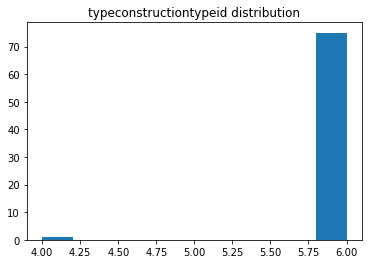

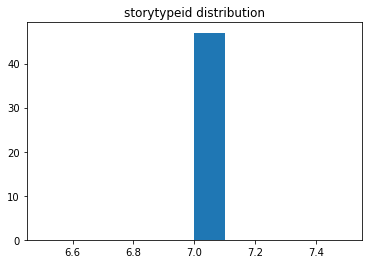

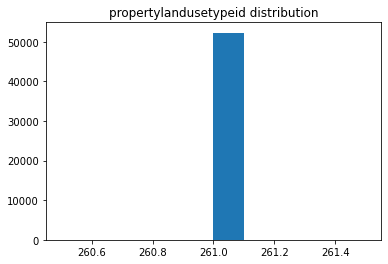

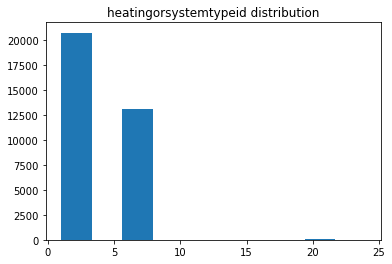

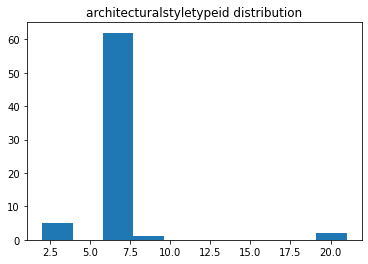

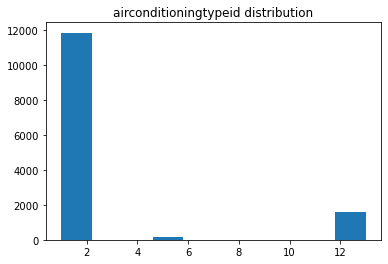

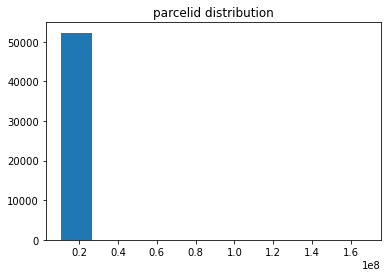

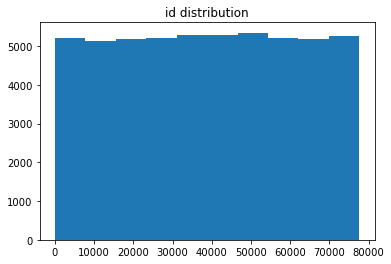

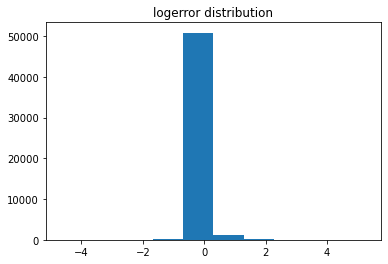

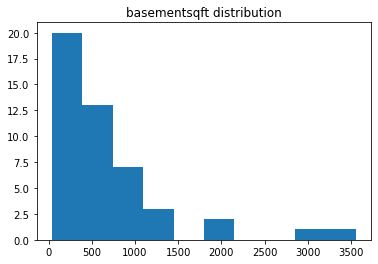

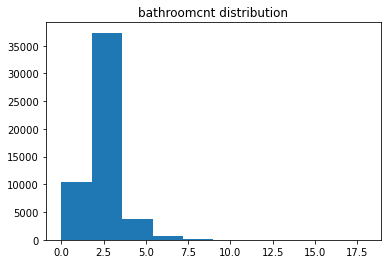

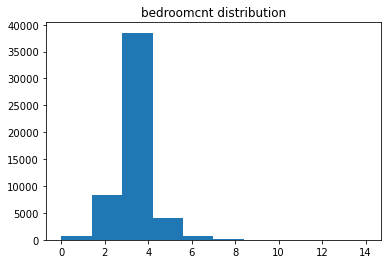

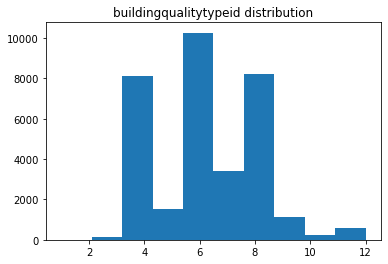

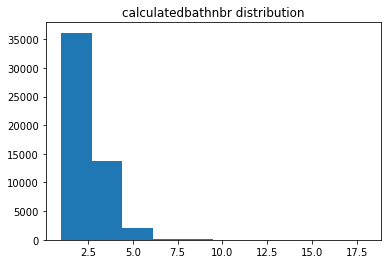

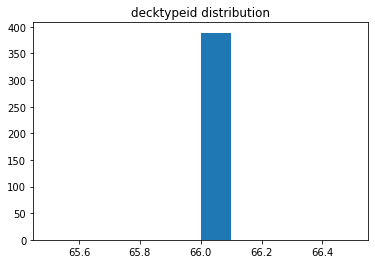

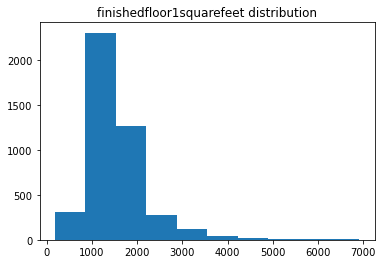

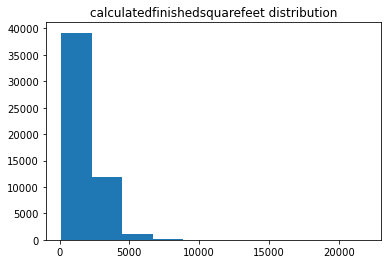

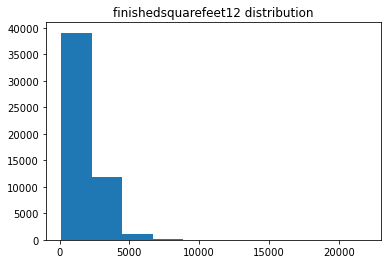

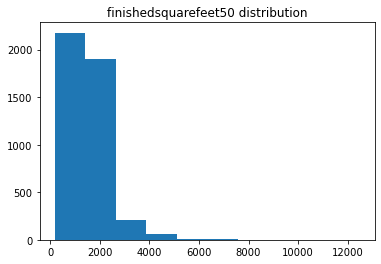

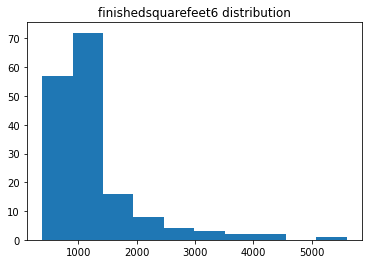

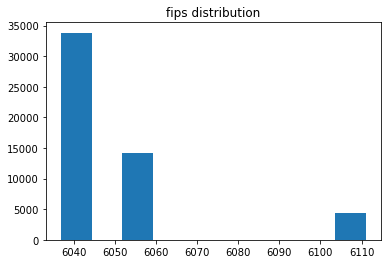

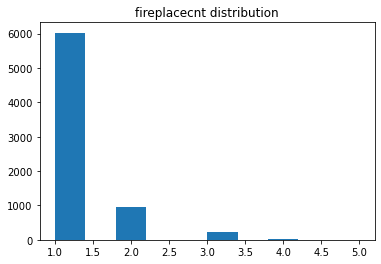

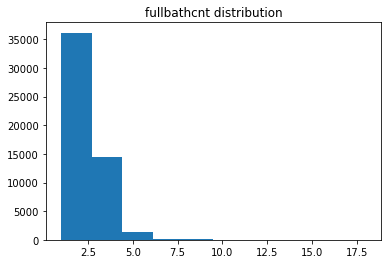

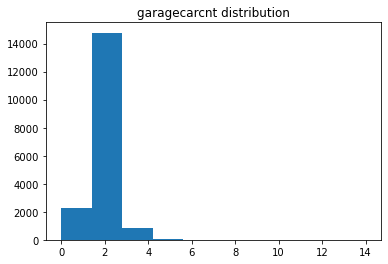

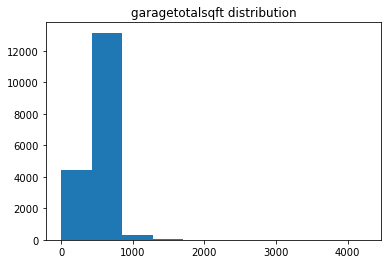

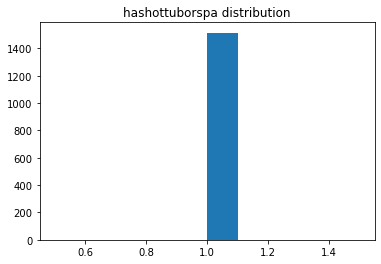

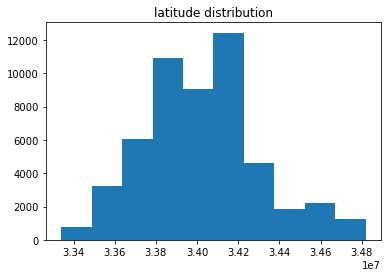

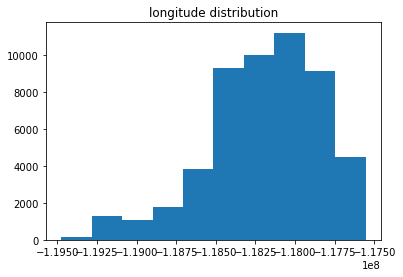

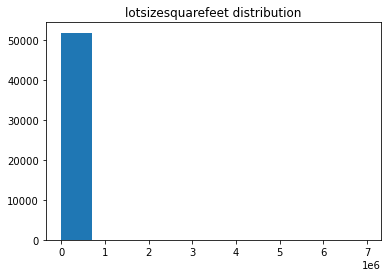

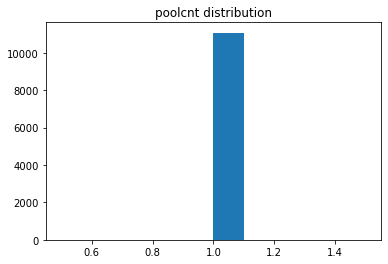

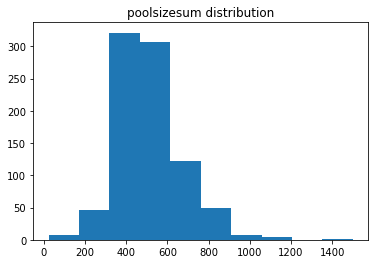

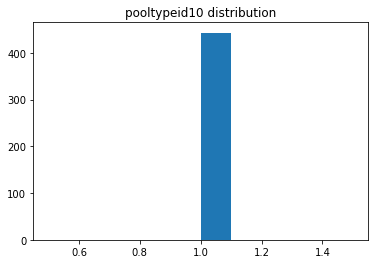

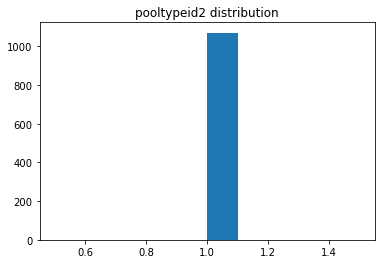

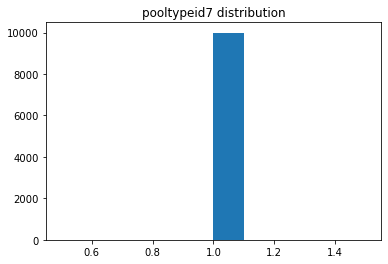

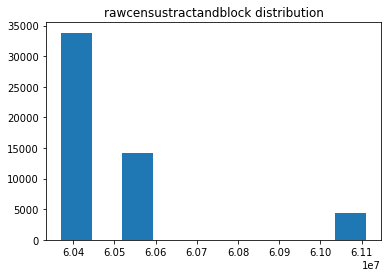

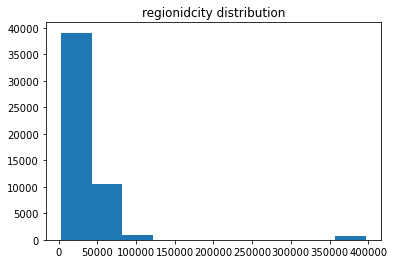

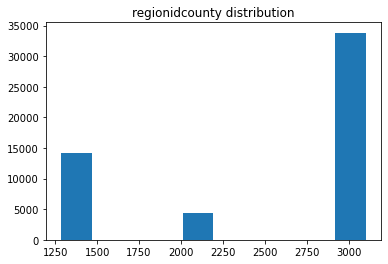

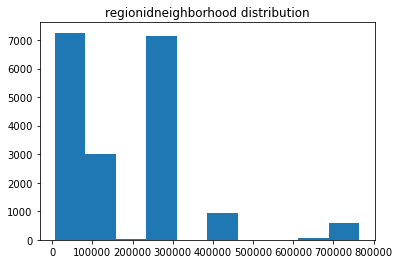

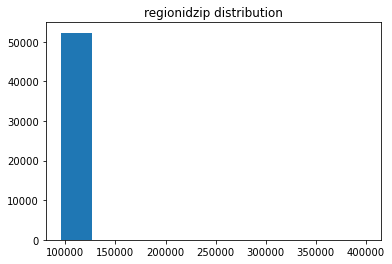

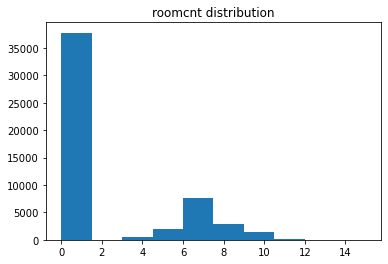

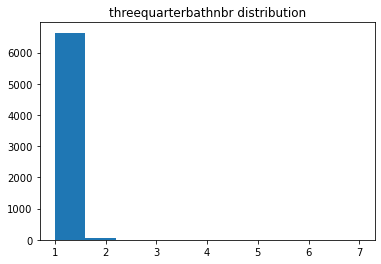

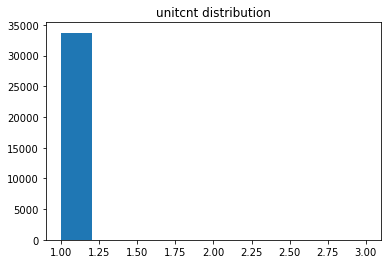

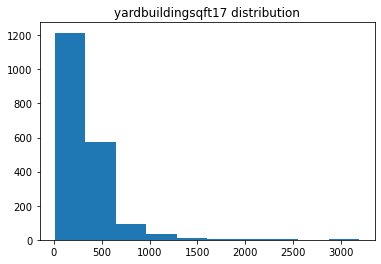

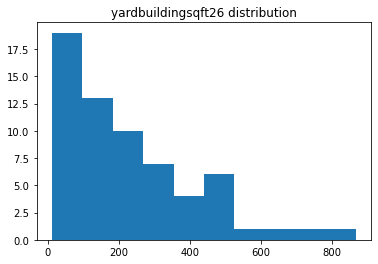

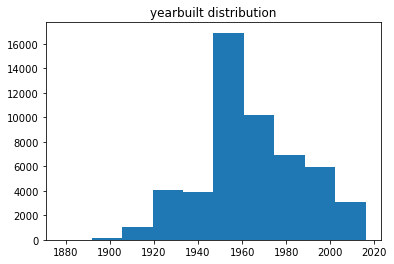

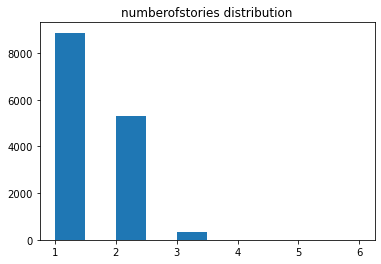

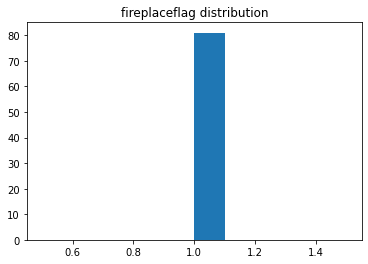

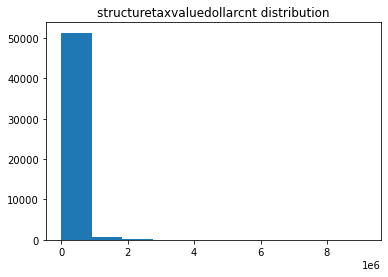

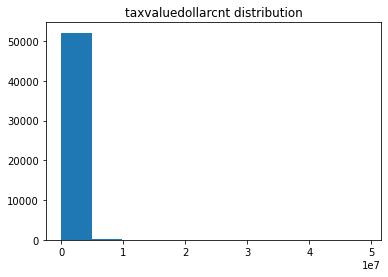

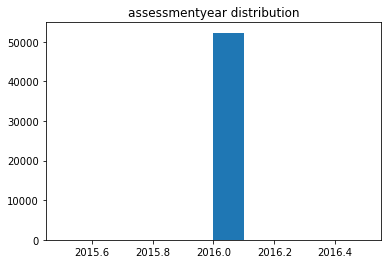

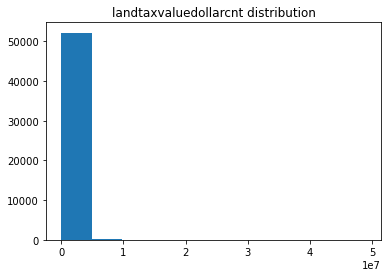

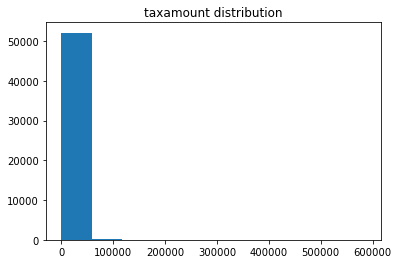

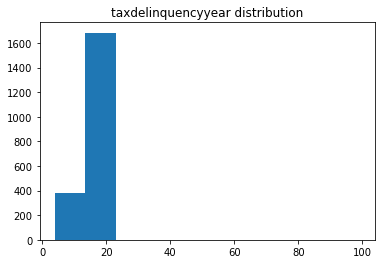

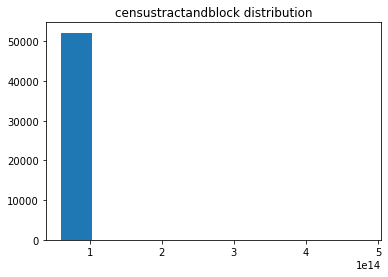

In [6]:
cont_hist(zillow_df)  ## <-- function that looks at the distributions of continuous variables

## Prepare Zillow